In [1]:
import numpy as np
import scipy
import scipy.optimize
import matplotlib.pyplot as plt
import time
from scipy import stats
import pandas as pd
import growth_simulations as g

growth_simulations.py:6: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/felix/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/felix/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/felix/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/felix/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/felix/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/home/fe

In [2]:
%load_ext autoreload 

In [3]:
%autoreload 2

In [54]:
par1 = {'nstep': 800, 'dt':0.01, 'td': None, 'td_std': None, 'v_init':1.0, 'modeltype':5, 'delta':1.0, 'lambda_std':0.2,
        'tbud_std':0.1, 'delta':1.0 , 'lambda':1.0,'r':0.5}

In [55]:
init_pop = g.starting_popn(par1)
c, obs = g.discr_time_1(par1, init_pop)

LinregressResult(slope=0.2058534340077009, intercept=0.22524956848715416, rvalue=0.465256379218623, pvalue=0.0, stderr=0.0030310226255456417)


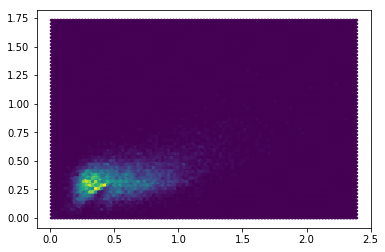

LinregressResult(slope=0.050323165911690955, intercept=0.634837537141435, rvalue=0.27423289938767176, pvalue=7.726272884769963e-286, stderr=0.001365690292021511)


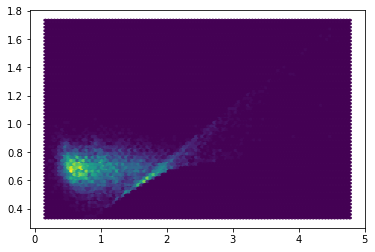

In [69]:
output_data=np.zeros([17])
temp1 = scipy.stats.linregress(obs[1][400:], np.log(obs[4][400:]))
output_data[0] = temp1[0]  # population number growth rate
temp1 = scipy.stats.linregress(obs[1][400:], np.log(obs[7][400:]))
output_data[1] = temp1[0]  # population volume growth rate
del temp1

for temp_ind in range(2):
    tgrow = [obj.t_grow for obj in c[10**4:] if obj.celltype == temp_ind]
    output_data[2+temp_ind] = np.mean(tgrow)

t1 = scipy.stats.zscore(np.asarray([obj.t_grow for obj in c[10**4:-1] if obj.celltype == 0]))
t2 = scipy.stats.zscore(np.asarray([obj.parent.t_grow for obj in c[10**4:-1] if obj.celltype == 0]))
temp2 = scipy.stats.linregress(t2, t1)
output_data[4] = temp2[2]  # mother mother R value
temp2 = scipy.stats.pearsonr(t1, t2)
output_data[5] = temp2[0]  # mother mother PCC

t1 = scipy.stats.zscore(np.asarray([obj.t_grow for obj in c[10 ** 4:-1] if obj.celltype == 1]))
t2 = scipy.stats.zscore(np.asarray([obj.parent.t_grow for obj in c[10 ** 4:-1] if obj.celltype == 1]))
temp2 = scipy.stats.linregress(t2, t1)
output_data[6] = temp2[2]  # mother daughter R value
del temp2
temp2 = scipy.stats.pearsonr(t1, t2)
output_data[7] = temp2[0]  # mother daughter PCC

t1 = scipy.stats.zscore(np.asarray([obj.t_grow for obj in c[10 ** 4:-1] if obj.celltype == 1]))
t2 = scipy.stats.zscore(np.asarray([obj.parent_current.t_grow for obj in c[10 ** 4:-1] if obj.celltype == 1]))
temp2 = scipy.stats.linregress(t2, t1)
output_data[8] = temp2[2]  # mother daughter R value same generation
del temp2
temp2 = scipy.stats.pearsonr(t1, t2)
output_data[9] = temp2[0]  # mother daughter PCC same generation
output_data[10] = np.mean([obj.vb for obj in c[10**4:-1] if obj.celltype == 0])  # mother <vb>
output_data[11] = np.mean([obj.vb for obj in c[10**4:-1] if obj.celltype == 1])  # daughter <vd>
output_data[12] = np.mean([obj.vs for obj in c[10**4:-1]])  # <vs>
# mother vb vd slope
output_data[13] = scipy.stats.linregress([obj.vb for obj in c[10**4:-1] if obj.celltype == 0],[obj.vd for obj in c[10**4:-1] if obj.celltype == 0])[0]
# daughter vb vd slope
output_data[14] = scipy.stats.linregress([obj.vb for obj in c[10**4:-1] if obj.celltype == 1],[obj.vd for obj in c[10**4:-1] if obj.celltype == 1])[0]
# daughter added volume slope
temp1 = [obj.vs-obj.vb+obj.parent.r*(obj.parent.vd-obj.parent.vs)/(1+obj.parent.r) for obj in c[10**4:-1] if obj.celltype == 1]
temp2 = [obj.vb for obj in c[10**4:-1] if obj.celltype==1]
temp3 = scipy.stats.linregress(temp2,temp1)
print temp3
plt.hexbin(temp2,temp1)
plt.show()
output_data[15] = temp3[0]
# daughter added volume slope
temp1 = [obj.vs-obj.vb+(obj.parent.vd-obj.parent.vs)/(1+obj.parent.r) for obj in c[10**4:-1] if obj.celltype == 0]
temp2 = [obj.vb for obj in c[10**4:-1] if obj.celltype==0]
temp3 = scipy.stats.linregress(temp2,temp1)
print temp3
plt.hexbin(temp2,temp1)
plt.show()
output_data[16] = temp3[0]


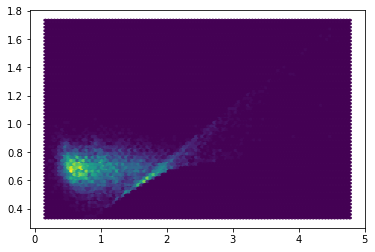

In [68]:
plt.hexbin(temp2,temp1)
plt.show()

In [63]:
print output_data, par1, len(c)

[0.97545301 0.97150583 0.77295331 0.74921541 0.08191477 0.08191477
 0.21282852 0.21282852 0.47219639 0.47219639 1.13624773 0.54610142
 1.07786474 1.08740525 1.13488176 0.20585343] {'td_std': None, 'lambda_std': 0.2, 'delta': 1.0, 'dt': 0.01, 'nstep': 800, 'v_init': 1.0, 'modeltype': 5, 'r': 0.5, 'tbud_std': 0.1, 'td': None, 'lambda': 1.0} 43398


In [53]:
print output_data, par1, len(c)

[1.00001944 1.00000753 0.73723096 0.71690233 0.1251507  0.1251507
 0.30016966 0.30016966 0.71078624 0.71078624 1.13371252 0.54535748
 1.07618818 1.08597817 1.12611539] {'td_std': None, 'lambda_std': 0.001, 'delta': 1.0, 'dt': 0.01, 'nstep': 800, 'v_init': 1.0, 'modeltype': 5, 'r': 0.5, 'tbud_std': 0.1, 'td': None, 'lambda': 1.0} 50092


In [43]:
print output_data, par1, len(c)

[1.00370892 0.99999551 0.7120298  0.7120262  0.49384192 0.49384192
 0.49383083 0.49383083 0.99993324 0.99993324 1.0839633  0.54195479
 1.04198692 1.00000748 1.00000366] {'td_std': None, 'lambda_std': 0.001, 'delta': 1.0, 'dt': 0.01, 'nstep': 800, 'v_init': 1.0, 'modeltype': 5, 'r': 0.5, 'tbud_std': 0.001, 'td': None, 'lambda': 1.0} 50178


In [15]:
print output_data, par1

[0.96019737 0.97367243 0.84927629 0.6718607  0.13708902 0.13708902
 0.17827982 0.17827982 0.60635208 0.60635208 1.22280429 0.60975693] {'td_std': None, 'lambda_std': 0.2, 'delta': 1.0, 'dt': 0.01, 'nstep': 700, 'v_init': 1.0, 'modeltype': 5, 'r': 0.5, 'tbud_std': 0.02, 'td': None, 'lambda': 1.0}
